In [1]:
import numpy as np

In [2]:
import sys
sys.path.append('./')

In [3]:
import layers

In [4]:
import BackProp

In [5]:
z1 = layers.DenseLayer(layers.activations.sigmoid, layers.activations.d_sigmoid_dx, use_bias=True)
z2 = layers.DenseLayer(layers.activations.sigmoid, layers.activations.d_sigmoid_dx, use_bias=True)
y =  layers.DenseLayer(layers.activations.identity, layers.activations.d_identity_dx)

z1.w = np.array(
    [
        [-1, -2, -3],
        [ 1,  2,  3]
    ]
)
z2.w = np.array(
    [
        [-1, -2, -3],
        [ 1,  2,  3]
    ]
)
y.w = np.array(
    [
        [ -1,  2, -1.5]
    ]
)

In [6]:
dLdws = BackProp.compute_gradient_via_backprop(
    layers=[z1, z2, y],
    x=np.array([1, 1, 1]),
    y_true=1,
    dLdy_fn=lambda Y, y_true: Y-y_true # derivative of arbitrary loss function
)

In [7]:
import pandas as pd

In [8]:
train = pd.read_csv(
    '../data/bank-note/train.csv',
    names=['variance', 'skewness', 'curtosis', 'entropy', 'y']
)

In [9]:
train

,variance,skewness,curtosis,entropy,y
0,3.848100,10.15390,-3.85610,-4.22280,0
1,4.004700,0.45937,1.36210,1.61810,0
2,-0.048008,-1.60370,8.47560,0.75558,0
3,-1.266700,2.81830,-2.42600,-1.88620,1
4,2.203400,5.99470,0.53009,0.84998,0
...,...,...,...,...,...
867,0.273310,4.87730,-4.91940,-5.81980,1
868,1.063700,3.69570,-4.15940,-1.93790,1
869,-1.242400,-1.71750,-0.52553,-0.21036,1
870,1.837300,6.12920,0.84027,0.55257,0


In [10]:
X = np.array(train)[:,:-1]
X = np.concatenate([np.ones(shape=X.shape[0])[np.newaxis].T, X], axis=1) # for bias trick
Y = (np.array(train)[:,-1] * 2) - 1
X.shape, Y.shape

((872, 5), (872,))

In [79]:
def build_nn(width):
    a = layers.DenseLayer(layers.activations.sigmoid, layers.activations.d_sigmoid_dx)
    b = layers.DenseLayer(layers.activations.sigmoid, layers.activations.d_sigmoid_dx)
    c =  layers.DenseLayer(layers.activations.sigmoid, layers.activations.d_sigmoid_dx)

    a.w = np.random.normal(size=[width, X.shape[1]])
    b.w = np.random.normal(size=[width, width])
    c.w = np.random.normal(size=[1, width])
    
    print(a.w.shape, b.w.shape, c.w.shape)
    
    return [a, b, c]

In [80]:
def lr(t):
    lr_0 = 0.01
    lr_d = 1
    return lr_0/(1+((lr_0/lr_d)*t))

In [81]:
def loss(y, y_true):
    return (1/2) * ((y-y_true) **2)

In [87]:
def train_nn(width=10, T=30, lr_sched=lr):
    nn_layers = build_nn(width)
    mean_loss = []
    for t in range(0, T):
        lr = lr_sched(t)
        X_samples = list(range(0, len(X)))
        np.random.shuffle(X_samples)
        for i in X_samples:
            dLdws = reversed(BackProp.compute_gradient_via_backprop(
                layers=nn_layers,
                x=X[i],
                y_true=Y[i],
                dLdy_fn=lambda _Y, _y_true: _Y-_y_true # derivative of arbitrary loss function
            ))
            # do the update
            for dLdw, layer in zip(dLdws, nn_layers):
                layer.w -= lr * dLdw
        mean_loss.append(
            np.mean(loss(np.array([ layers.evaluate_nn(nn_layers, x) for x in X ]), Y)))
    return mean_loss
mean_loss = train_nn()

(10, 5) (10, 10) (1, 10)


In [88]:
import matplotlib.pyplot as plt

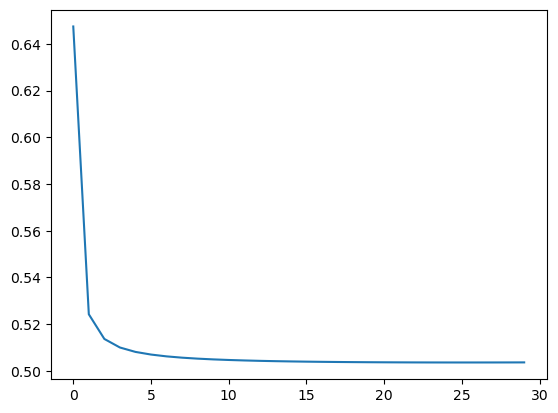

In [89]:
plt.plot(mean_loss)

In [85]:
def lr2(t):
    lr_0 = 0.001
    lr_d = 1000
    return lr_0/(1+((lr_0/lr_d)*t))
mean_loss = train_nn(width=10, lr_sched=lr2)

(10, 5) (10, 10) (1, 10)


Text(0.5, 0, 'x')

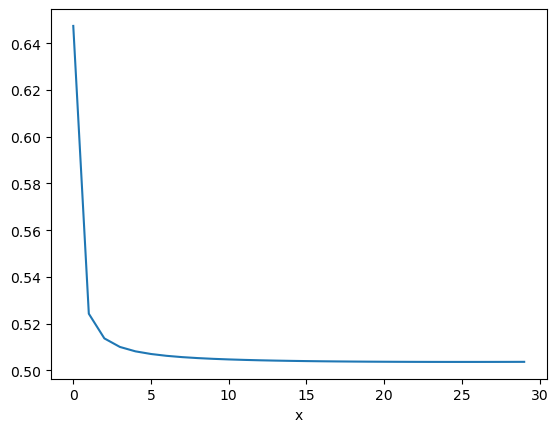

In [91]:
plt.plot(mean_loss)
plt.xlabel('x')